# Øving 9: Enkel lineær regresjon

Dette er en Jupyter-notatbok. Se i Python-ressursene i venstremenyen i emnet i Blackboard hvis du ikke vet helt hvordan du bruker notatboken! 

**Kortversjon:** dobbeltklikk på en celle for å komme i edit-mode, gjør endringene din og kjør koden i en celle med shift-enter (eller velge play-knappen i vertøylinja over). For å kjøre alt i notatboka kan du trykke shift-enter på alle celler (en etter en), eller gå i menyen for hubben (til venstre) og velge Run-"Run all cells".

In [1]:
import pandas as pd # for å lese data fra csv-fil
import seaborn as sns # plotting
import numpy as np #numerikk
import statsmodels.api as sms # regresjonen
import statsmodels.formula.api as smf # modellformel for regresjonen
import matplotlib.pyplot as plt # plotte regresjonslinje med KI og PI
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)# fordi en av plottefunksjonene må oppdateres av utvikler og kommer per i dag med lang FutureWarning som vi ikke vil se på


## Spørsmål 7:
Vi leser inn datasettet 'sykkel.csv' og plotter `y = Kalorier` mot `x = MaksPuls` og `y = Kalorier` mot `x = Tid` med en plottefunksjon som også viser estimert regresjonslinje og 95% konfidensintervall for linja. Kanskje ser du allerede hvilken modell som vi ha høyeste $R^2$, alså høyeste andel forklart varians i kaloriforbruk? 

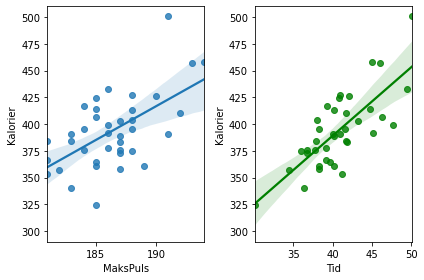

In [2]:
dfsykkel = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/python_felles/sykkel.csv') # lese inn datasettet
dfsykkel.head()

plt.subplot(1, 2, 1)
sns.regplot(x='MaksPuls', y='Kalorier', data=dfsykkel)
plt.ylim(290,510)

plt.subplot(1, 2, 2)
sns.regplot(x='Tid', y='Kalorier', color ="g", data=dfsykkel)
plt.ylim(290,510)

plt.tight_layout(); plt.show()

I koden nedenfor har vi tilpasset en slik lineær regresjonsmodell for `Kalorier` som funksjon av på `MaksPuls`. Finn ut hvor god modellen er, og sammenlign med en ny modell der du bytter ut `MaksPuls` med `Tid`. Når du har bestemt deg for hvilken kovariat som er den beste forklaringsvariabelen (se på andelen forklart varians, $R^2$, som heter "R-squared" i utskriften under), så fyller du inn svarene i STACK-øvingen.

In [3]:
sykkelmodell = smf.ols('Kalorier~Tid', data=dfsykkel).fit()
sykkelmodell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Kalorier   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     48.17
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           3.93e-08
Time:                        08:26:25   Log-Likelihood:                -171.82
No. Observations:                  38   AIC:                             347.6
Df Residuals:                      36   BIC:                             350.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    133.3837     37.689      3.539      0.001      56.947     209.821
Tid            6.3946      0.921      6.940      0.000       4.526       8.263
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                1.033
Skew:                           0.139   Prob(JB):                        0.597
Kurtosis:                       2.241   Cond. No.                         416.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Spørsmål 8: 

Du har fått beskjed om hvilken datafil du skal bruke - det er enten filA, filB, eller filC. Start med å spesifisere hvilken fil du skal bruke og så leses data inn fra filen og de første radene skrives ut.

In [4]:
filA="https://www.math.ntnu.no/emner/IST100x/python_felles/dataA.csv"
filB="https://www.math.ntnu.no/emner/IST100x/python_felles/dataB.csv"
filC="https://www.math.ntnu.no/emner/IST100x/python_felles/dataC.csv"

In [5]:
minfil=filA # endre til hvilken fil du skal bruke
df = pd.read_csv(minfil)
df.describe()

,y,x
count,30.000000,30.000000
mean,3.867795,4.185390
std,1.192652,1.201630
min,2.015389,2.082806
25%,2.973725,3.414420
50%,3.883617,4.240345
75%,4.634277,4.960612
max,5.934535,6.365439


Legg merke til at vi har en kovariat som heter $x$ og en repons som heter $y$. 

### 8a) Kryssplott

Under finner du et kryssplott av x mot y. Hvilken sammenheng er det mellom x og y?

* trolig ingen
* positiv lineær sammenheng
* negativ lineær sammenheng
* ikke-lineær sammenheng

Fyll inn svar i STACK.

          y         x
y  1.000000 -0.869797
x -0.869797  1.000000


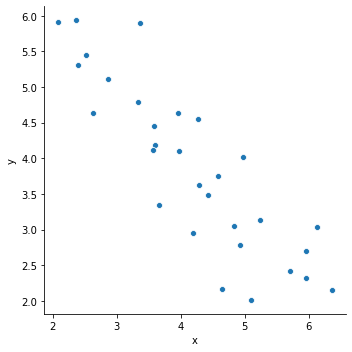

In [6]:
sns.relplot(x="x", y="y",data = df)

print(df.corr())# dette er en matrise med korrelasjonskoeffisienten i element 2,1 og 1,2

### 8b) Utskrift fra tilpasning av enkel lineær regresjon

Under er det kode for å tilpasse en enkel lineær regresjon. 

På stack skal du skrive inn numerisk verdi for

* antall datapunkt $n$ i datasettet
* estimert stigningstall $\hat{\beta}_1$
* estimert standardavvik til stigningstallet 

In [7]:
formel='y~x'
modell = smf.ols(formel,df).fit()
modell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     87.01
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           4.37e-10
Time:                        08:26:25   Log-Likelihood:                -26.153
No. Observations:                  30   AIC:                             56.31
Df Residuals:                      28   BIC:                             59.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4810      0.402     18.587      0.000       6.657       8.306
x             -0.8633      0.093     -9.328      0.000      -1.053      -0.674
==============================================================================
Omnibus:                        0.650   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.191
Skew:                          -0.190   Prob(JB):                        0.909
Kurtosis:                       3.092   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 8c) Hypotesetest 

Hvilken hypotesetest utføres i utskriften (midterste panel) i linjen som starter med "coef"?

* $H_0: \beta_0=1$ mot $H_1: \beta_0>1$
* $H_0: \beta_0=0$ mot $H_1: \beta_0\neq 0$
* $H_0: \beta_1= -1 $ mot $H_1: \beta_0 < -1$
* $H_0: \beta_1=0$ mot $H_1: \beta_1\neq 0$

Vi forkaster $H_0$ til fordel for $H_1$ ved signifikansnivå $\alpha = 0.01$ dersom $p$-verdien er lavere enn $0.01$. Kan vi forkaste null-hypotesen ved signifikansnivå $\alpha = 0.01$?

Du leser av $p$-verdien i utskriftens midterste panel og svarer på om du kan forkaste nullhypotesen på stack.